In [2]:
pip install git+https://github.com/scikit-learn-contrib/boruta_py.git

  Cloning https://github.com/scikit-learn-contrib/boruta_py.git to c:\users\dkalap~1\appdata\local\temp\pip-req-build-ufwxpm5_
  Created wheel for Boruta: filename=Boruta-0.1.5-cp37-none-any.whl size=54028 sha256=273933486c271b62edb6730e452a5f7c39f9ace443488c68e73335e1867a023f
  Stored in directory: C:\Users\DKALAP~1\AppData\Local\Temp\pip-ephem-wheel-cache-10x6cfvd\wheels\a0\20\e3\8bf8bd81ea07e3cbd1f5c063185af2646c97ada8ca7f7a5969
Successfully built Boruta
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/scikit-learn-contrib/boruta_py.git 'C:\Users\DKALAP~1\AppData\Local\Temp\pip-req-build-ufwxpm5_'


In [ ]:
#pip install feature_selector

In [ ]:
pip install catboost

In [ ]:
pip install joblib

In [1]:

#import shap

In [99]:
import numpy as np
import pandas as pd
import pickle
import boruta
import seaborn as sns
import matplotlib.pyplot as plt
from pandas                 import DataFrame
from sklearn.metrics        import roc_auc_score
from numpy import array
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# import machine learning algorithms
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from scipy.stats            import pearsonr
from sklearn.metrics        import accuracy_score
import lightgbm as lgb
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss


# Data Preparation

In [100]:
train_path = 'C:/Users/dkalapati/Documents/kaggle competition/bank_mkt_train.csv'
predict_path = 'C:/Users/dkalapati/Documents/kaggle competition/bank_mkt_test.csv'

In [101]:
train_set = pd.read_csv(train_path)
predict_set = pd.read_csv(predict_path)

In [102]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
client_id         7000 non-null int64
age               7000 non-null int64
job               7000 non-null object
marital           7000 non-null object
education         7000 non-null object
default           7000 non-null object
housing           7000 non-null object
loan              7000 non-null object
contact           7000 non-null object
month             7000 non-null object
day_of_week       7000 non-null object
campaign          7000 non-null int64
pdays             7000 non-null int64
previous          7000 non-null int64
poutcome          7000 non-null object
emp.var.rate      7000 non-null float64
cons.price.idx    7000 non-null float64
cons.conf.idx     7000 non-null float64
euribor3m         7000 non-null float64
nr.employed       7000 non-null float64
subscribe         7000 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usage: 1.1+ MB


In [103]:
#function for plotting graphs
def data_plot(data,col):
    countplt=sns.countplot(x=col, data=data, palette ='hls')
    plt.show()

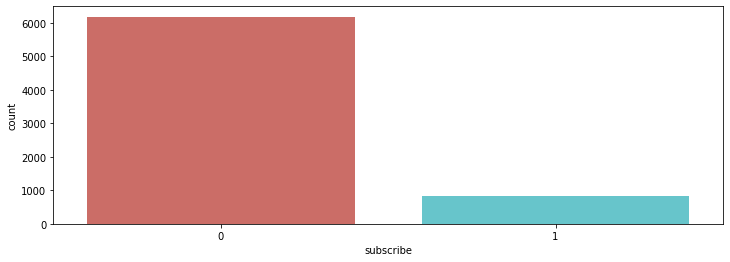

0    6178
1     822
Name: subscribe, dtype: int64

In [104]:
#plotting label
data_plot(train_set,"subscribe")
train_set["subscribe"].value_counts()

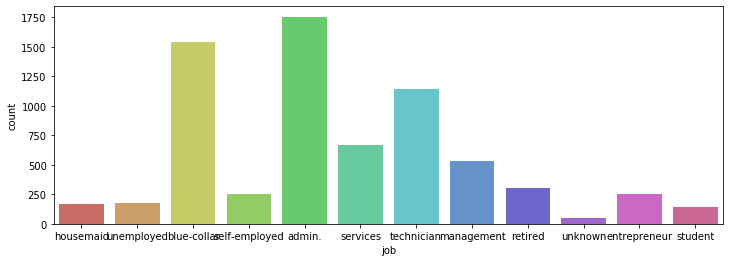

admin.           1756
blue-collar      1541
technician       1143
services          668
management        534
retired           306
self-employed     256
entrepreneur      253
unemployed        176
housemaid         172
student           146
unknown            49
Name: job, dtype: int64

In [105]:
#plotting job variable
data_plot(train_set,"job")
train_set["job"].value_counts()

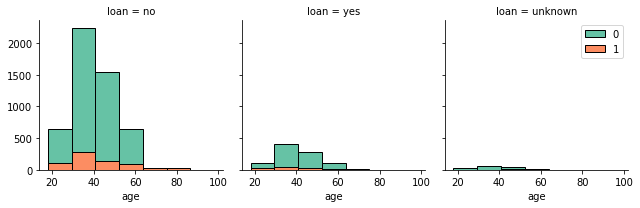

In [106]:
#plotting age over loan category and label
bins = np.linspace(train_set.age.min(), train_set.age.max(), 8)
g = sns.FacetGrid(train_set, col="loan", hue="subscribe", palette="Set2", col_wrap=3)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

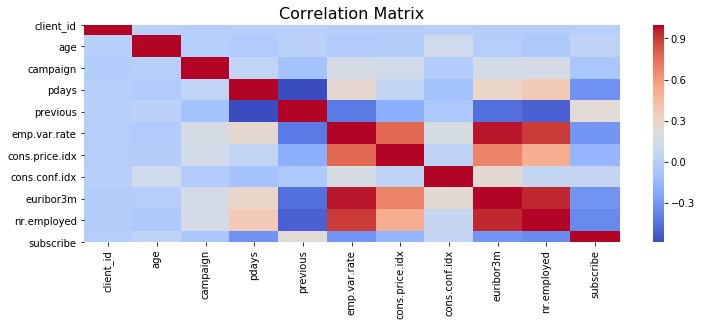

In [107]:
#correlation of numerical variables
train_corr = train_set.select_dtypes(include = ["int64","float64"])
num_corr = train_corr.corr()
sns.heatmap(num_corr, cbar=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16,)
plt.show()

In [108]:
#creating a prediction table with id's from our predict set
prediction = DataFrame(columns = ["client_id","subscribe"])
prediction["client_id"] = predict_set["client_id"]

In [109]:
#getting the ids from train set and setting the client id as index for both train the predict set
train_client = train_set["client_id"]
train_set.set_index("client_id", inplace=True)
predict_set.set_index("client_id", inplace=True)

In [110]:
train_set.select_dtypes(exclude=['int64','float64']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [111]:
#getting the categorical columns from train set
cat_train = train_set[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']]

In [112]:
cat_train.head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
client_id,,,,,,,,,,
2,housemaid,single,high.school,no,no,no,telephone,may,mon,nonexistent
3,unemployed,married,basic.9y,unknown,yes,no,telephone,jun,fri,nonexistent
4,blue-collar,married,basic.6y,unknown,no,no,cellular,nov,tue,nonexistent
5,self-employed,single,university.degree,no,yes,no,cellular,may,mon,failure
6,admin.,single,high.school,unknown,yes,no,cellular,jul,fri,nonexistent
7,self-employed,married,university.degree,unknown,yes,no,telephone,jun,tue,nonexistent
8,blue-collar,married,basic.4y,no,yes,no,cellular,nov,tue,nonexistent
9,services,married,high.school,no,yes,no,cellular,nov,tue,nonexistent
14,admin.,married,university.degree,no,yes,no,cellular,nov,thu,nonexistent


In [113]:
#creating the dummies for categorical columns
cat_train = pd.get_dummies(cat_train)

In [114]:
train_set.select_dtypes(include=['int64','float64']).columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribe'],
      dtype='object')

In [115]:
#get numerical columns from the train set
int_train = train_set[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','subscribe']]

In [116]:
#merge both the categorical and numerical tables created
dum_train = pd.merge(int_train,cat_train,on = "client_id")

In [117]:
dum_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
client_id,,,,,,,,,,,,,,,,,,,,,
2,29,3,999,0,1.1,93.994,-36.4,4.858,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,39,6,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
4,49,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,0,...,0,0,0,0,0,1,0,0,1,0
5,32,3,999,1,-1.8,92.893,-46.2,1.299,5099.1,0,...,0,0,0,1,0,0,0,1,0,0
6,29,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0,...,0,0,1,0,0,0,0,0,1,0


In [118]:
dum_train.to_csv(r'C:\Users\dkalapati\Documents\kaggle competition\basetable.csv', index = False)

Predict Set Preparation

In [68]:
cat_predict = predict_set[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']]

In [69]:
cat_predict = pd.get_dummies(cat_predict)

In [70]:
int_predict = predict_set[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [71]:
dum_predict = pd.merge(int_predict,cat_predict,on = "client_id")

Splitting Train set into train and validation

In [72]:
#splitting into train and validation
train, validation = train_test_split(dum_train, test_size=0.30, random_state = 1)

In [73]:
print("train")
print(train.subscribe.value_counts() , train.shape)
print("validation")
print(validation.subscribe.value_counts(), validation.shape)

train
0    4312
1     588
Name: subscribe, dtype: int64 (4900, 62)
validation
0    1866
1     234
Name: subscribe, dtype: int64 (2100, 62)


# Feature Selection

Selecting features based on feature Importance 

In [74]:
#we create a seed for consistency. This will be used by our algorithms.
np.random.seed(123)

In [75]:
#get all features except label
features = list(train.columns)
features.remove('subscribe')

In [76]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(61)

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [77]:
# Fit the model twice to avoid overfitting
for i in range(2):
    # Train using early stopping
    model.fit(train[features], train["subscribe"], early_stopping_rounds=500, eval_set = [(validation[features], validation["subscribe"])], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 500 rounds
[200]	valid_0's auc: 0.78688	valid_0's binary_logloss: 0.369921
[400]	valid_0's auc: 0.784659	valid_0's binary_logloss: 0.358231
Early stopping, best iteration is:
[16]	valid_0's auc: 0.820428	valid_0's binary_logloss: 0.49897
Training until validation scores don't improve for 500 rounds
[200]	valid_0's auc: 0.78688	valid_0's binary_logloss: 0.369921
[400]	valid_0's auc: 0.784659	valid_0's binary_logloss: 0.358231
Early stopping, best iteration is:
[16]	valid_0's auc: 0.820428	valid_0's binary_logloss: 0.49897


In [78]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(features), 'importance': feature_importances}).sort_values('importance', ascending = False)

In [79]:
feature_importances.head(15)

,feature,importance
0,age,96.0
7,euribor3m,89.0
1,campaign,32.0
33,default_no,21.0
5,cons.price.idx,19.0
6,cons.conf.idx,19.0
41,contact_cellular,17.0
2,pdays,14.0
35,housing_no,14.0
8,nr.employed,12.0


In [80]:
#through running a model and getting the features
selectedFeatures = feature_importances.iloc[:10,0]
target = "subscribe"

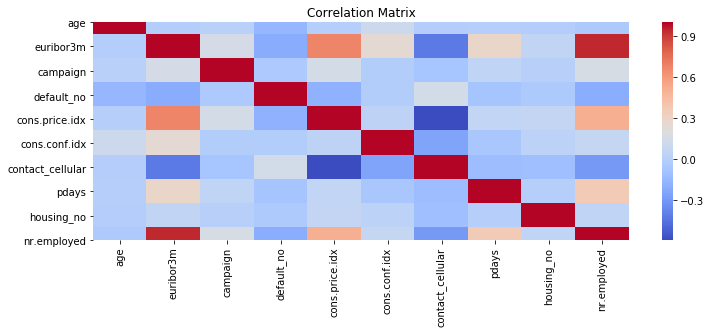

In [81]:
#correlation of variables
train_corr = train[selectedFeatures].corr()
sns.heatmap(train_corr, cbar=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Base Models

In [82]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter=1000)
randomForest = RandomForestClassifier()
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()
adaboost = AdaBoostClassifier()
linearDiscriminant = LinearDiscriminantAnalysis()
Quadratic = QuadraticDiscriminantAnalysis()
xboost = XGBClassifier()
catboost = CatBoostClassifier(task_type = 'CPU',verbose=False)

In [83]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors,
          "adaboost"     :adaboost,
          "linearDiscriminant" :linearDiscriminant,
          "Quadratic" :Quadratic,
          "xboost" : xboost,
          "catboost" : catboost
         }

In [84]:
#fitting the models
for model in models:
    models[model].fit(train[selectedFeatures],train[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully
adaboost has been trained successfully
linearDiscriminant has been trained successfully
Quadratic has been trained successfully
xboost has been trained successfully
catboost has been trained successfully


In [85]:
performances_training = {}

for model in models:
    predictions   = models[model].predict(train[selectedFeatures])
    probabilities = DataFrame(models[model].predict_proba(train[selectedFeatures]))[1]
    accuracy      = accuracy_score(train[target],predictions)
    auc           = roc_auc_score(array(train[target]),array(probabilities))
    
    performances_training[model] = {"Accuracy":accuracy,"AUC":auc}

In [86]:
DataFrame(performances_training)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors,adaboost,linearDiscriminant,Quadratic,xboost,catboost
Accuracy,0.986531,0.893061,0.972653,0.912245,0.890000,0.523061,0.908571,0.894286,0.883878,0.866531,0.945306,0.928367
AUC,0.999115,0.767965,0.996857,0.828493,0.677612,0.651245,0.919969,0.804969,0.760019,0.781758,0.964400,0.892010


In [87]:
performances = {}

for model in models:
    predictions   = models[model].predict(validation[selectedFeatures])
    probabilities = DataFrame(models[model].predict_proba(validation[selectedFeatures]))[1]
    accuracy      = accuracy_score(validation[target],predictions)
    auc           = roc_auc_score(array(validation[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}
    

In [88]:
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors,adaboost,linearDiscriminant,Quadratic,xboost,catboost
Accuracy,0.835238,0.902857,0.883810,0.900476,0.901905,0.531429,0.889048,0.897143,0.899048,0.887619,0.898095,0.897619
AUC,0.626514,0.783281,0.753679,0.805761,0.698583,0.642681,0.722487,0.798588,0.780267,0.787300,0.777942,0.808537


Function for Detailed Performance metrics

# Cross Validation

In [89]:
from sklearn.model_selection import KFold
from sklearn import model_selection
#Import libraries:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score  #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [90]:
def cv_fit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    
    print ("\nModel Report: ",alg)
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        print("\n-----------------------------------********************-----------------------------------\n")
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [91]:
for model in models:
    cv_fit(models[model],train,selectedFeatures,printFeatureImportance=False)


Model Report:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy : 0.9865
AUC (Train): 0.999115
CV Score : Mean - 0.6183054 | Std - 0.01557817 | Min - 0.5908194 | Max - 0.6342463

-----------------------------------********************-----------------------------------


Model Report:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy : 0.8931
AU

In [92]:
#function for various metrics
def performance(model, X_test, y_test):
    
    """
    Accepts a fitted model and an evaluation dataset at input.
    Prints the confusion matrix, classification_report & auc score. 
    Also, displays Precision-Recall curve & ROC curve.
    """
    print(model)
    # Make predictions on test set
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)

    # Confusion matrix
    print(confusion_matrix(y_test, y_pred))

    # AUC score
    y_pred_prob = model.predict_proba(X_test)
    print("AUC score: ", roc_auc_score(y_test, y_pred_prob[:,1]))

    # Logloss
    print("Logloss : ", log_loss(y_test, y_pred_prob))

    # Accuracy, Precision, Recall, F1 score print(classification_report(y_test, y_pred))
    
      # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Neural Network')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Precision-Recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.show()
    print("***********************----------------------------*************************")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[[1683  183]
 [ 153   81]]
AUC score:  0.6268172699040866
Logloss :  5.458274229309917


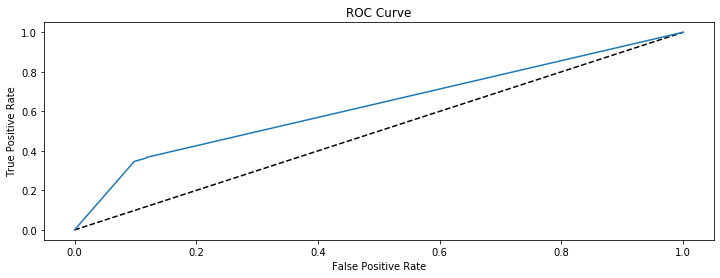

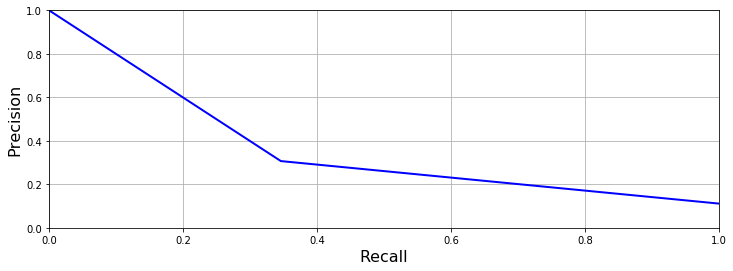

***********************----------------------------*************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[1850   16]
 [ 188   46]]
AUC score:  0.783281116882403
Logloss :  0.27568526588604103


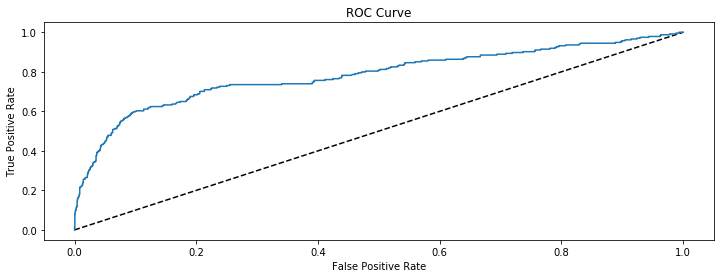

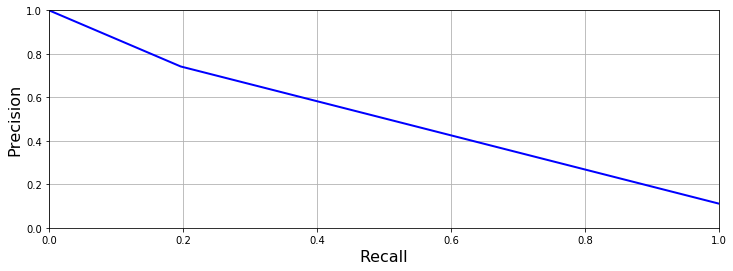

***********************----------------------------*************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[1794   72]
 [ 173   61]]
AUC score:  0.7440351865593022
Logloss :  1.1982598522484524


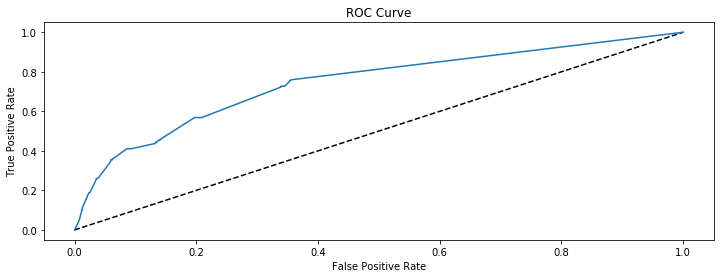

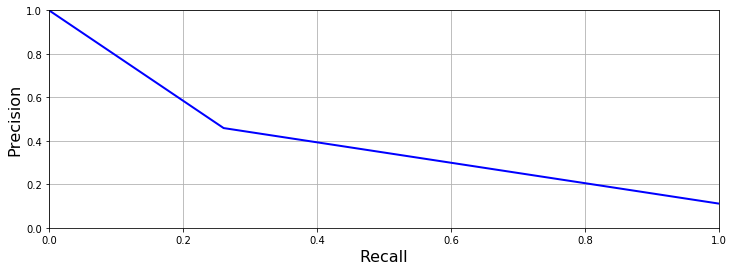

***********************----------------------------*************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
[[1835   31]
 [ 178   56]]
AUC score:  0.805836104469545
Logloss :  0.2742467521944138


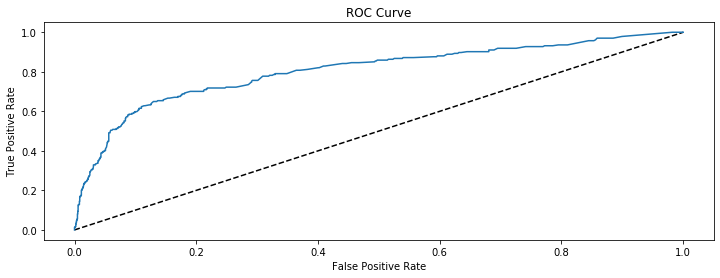

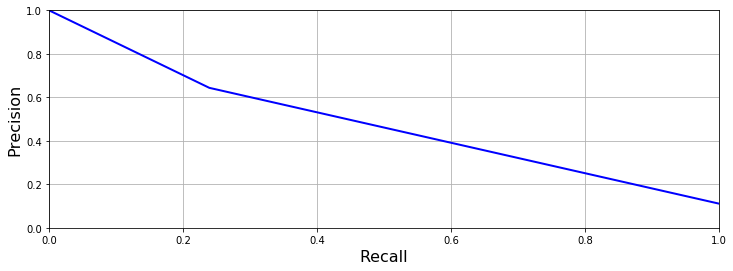

***********************----------------------------*************************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[1842   24]
 [ 182   52]]
AUC score:  0.6985828272001906
Logloss :  0.3146980987970265


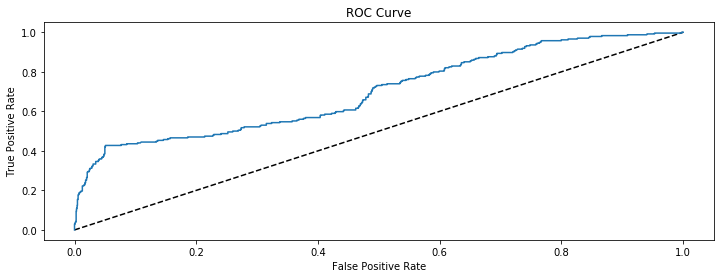

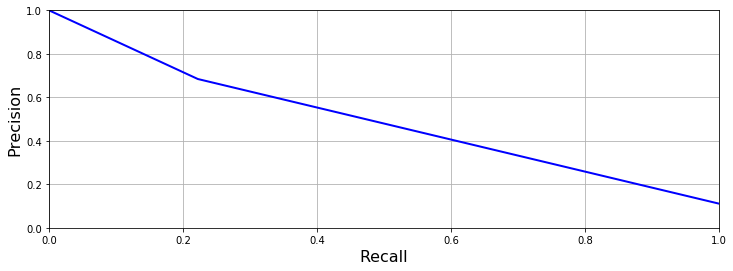

***********************----------------------------*************************
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[[1864    2]
 [ 215   19]]
AUC score:  0.7659145665576533
Logloss :  1.7613903231856616


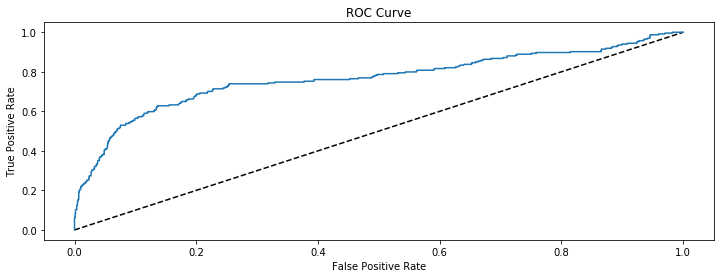

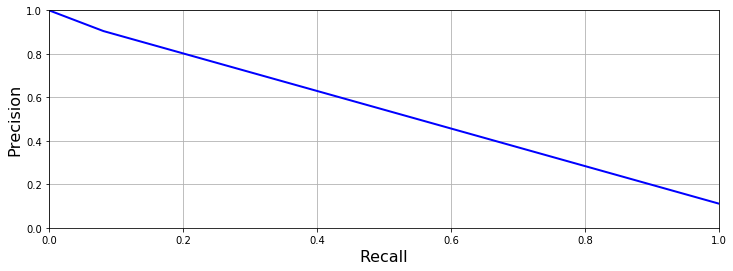

***********************----------------------------*************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[[1807   59]
 [ 174   60]]
AUC score:  0.7224867397696979
Logloss :  1.504417290570439


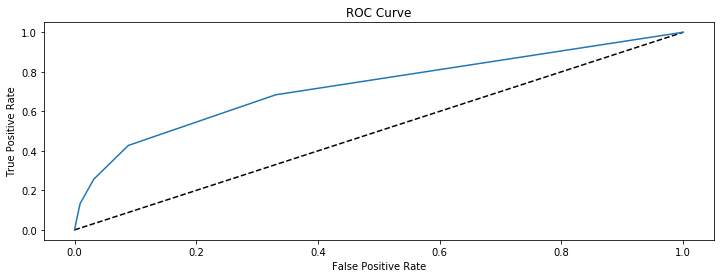

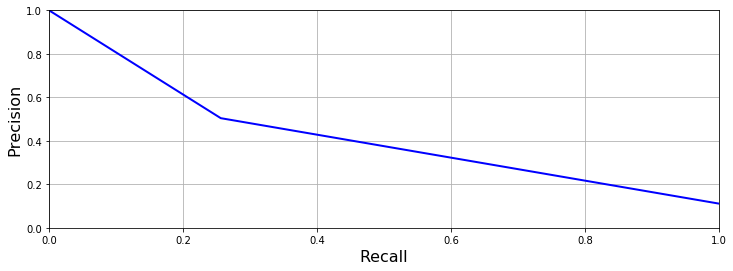

***********************----------------------------*************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
[[1841   25]
 [ 191   43]]
AUC score:  0.7985876366101446
Logloss :  0.6700627175554917


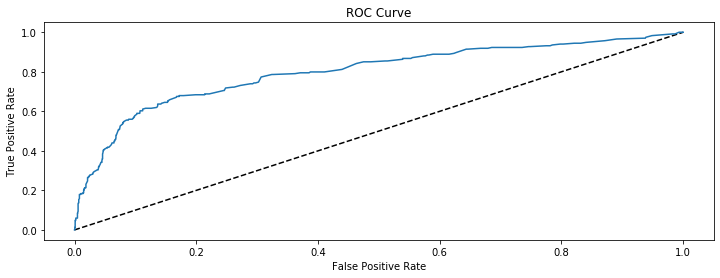

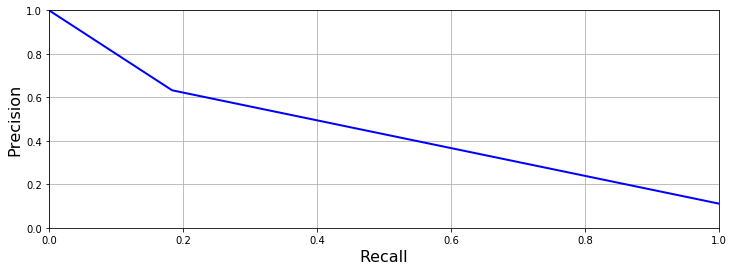

***********************----------------------------*************************
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
[[1807   59]
 [ 153   81]]
AUC score:  0.7802672199778309
Logloss :  0.2924734146010731


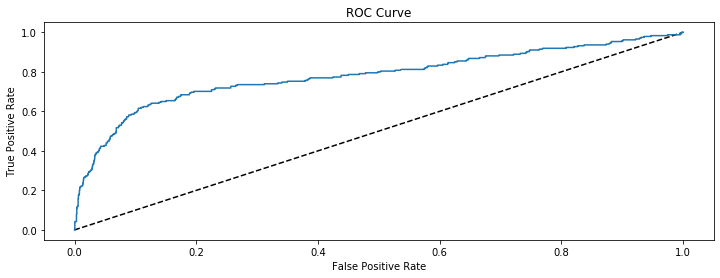

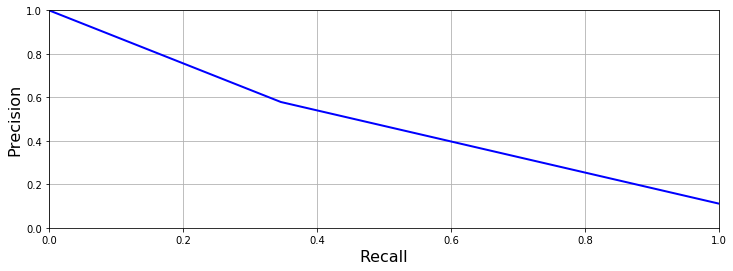

***********************----------------------------*************************
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
[[1753  113]
 [ 123  111]]
AUC score:  0.7873004094869047
Logloss :  0.8548207446873082


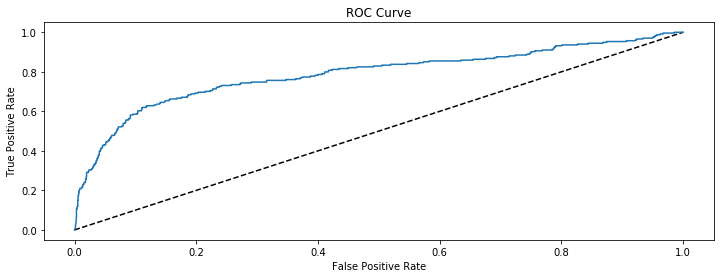

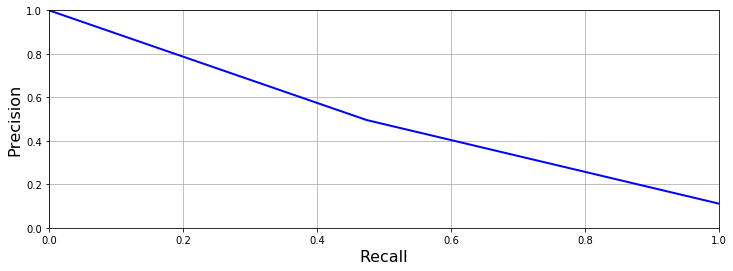

***********************----------------------------*************************
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
[[1820   46]
 [ 168   66]]
AUC score:  0.777941526735739
Logloss :  0.30309179362610894


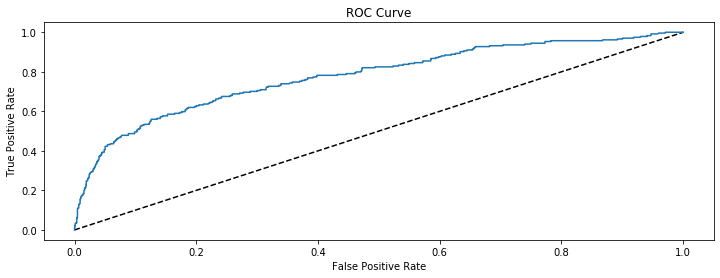

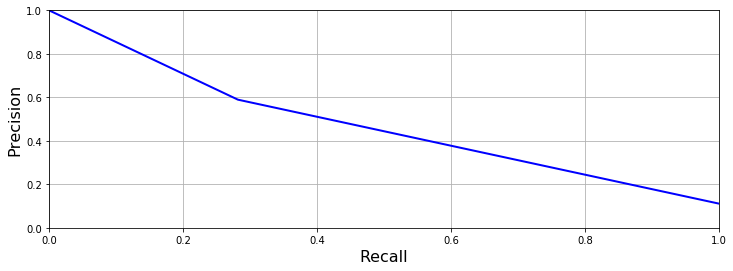

***********************----------------------------*************************
[[1828   38]
 [ 177   57]]
AUC score:  0.8085373897271003
Logloss :  0.2749724410675266


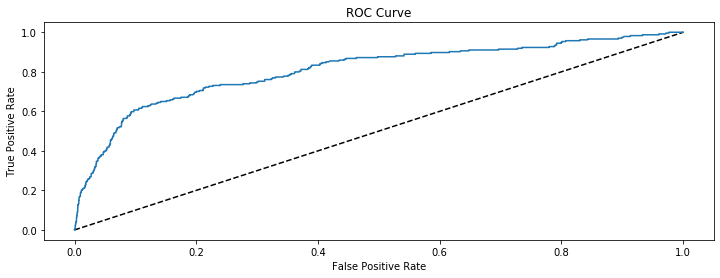

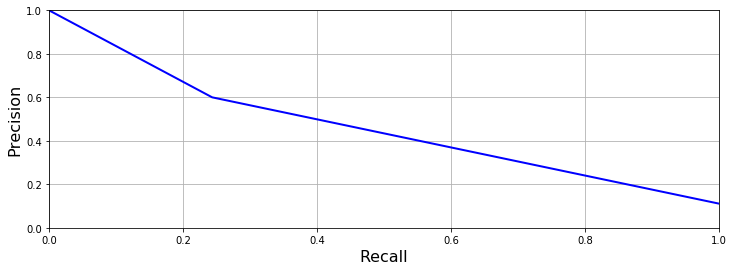

***********************----------------------------*************************


In [93]:
for model in models:
    performance(models[model],validation[selectedFeatures],validation[target])

# Grid Search 

Hyper parameter tunning code for other models has been removed for computational purpose.

In [82]:
param_test1 = {'iterations':range(600,1500,150) ,
               'learning_rate' : [0.05,0.20,0.25,0.30,0.35] ,
               'depth':range(5,10,1)}

gsearch1 = GridSearchCV(estimator = CatBoostClassifier(task_type = 'CPU',verbose=False), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[selectedFeatures],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x000002927F4DAA08>,
             iid=False, n_jobs=4,
             param_grid={'depth': range(5, 10),
                         'iterations': range(600, 1500, 150),
                         'learning_rate': [0.05, 0.2, 0.25, 0.3, 0.35]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [83]:
gsearch1.cv_results_ , gsearch1.best_params_ , gsearch1.best_score_

({'mean_fit_time': array([ 6.06159945,  7.06480036,  7.24699903,  7.23959947,  7.74119987,
          9.33259959,  9.33799982,  9.01439958,  9.32419968,  9.85459929,
         11.53919992, 11.39719949, 11.6193994 , 11.47839856, 11.88539953,
         13.5026001 , 13.07540059, 13.59619946, 13.73179913, 13.83619976,
         15.51019902, 17.00579967, 16.44200034, 15.1740087 , 16.10900946,
         18.34579978, 18.7529995 , 18.72239971, 18.72499995, 17.97099929,
          9.60440021,  9.81580024,  9.69900007,  9.70439892,  9.73500013,
         11.56479955, 11.64879985, 12.27559958, 11.89939942, 11.98739996,
         14.75519896, 14.03559966, 15.30839887, 16.67779984, 14.48539977,
         17.38000045, 19.82939963, 18.79199886, 18.03339901, 18.68939972,
         20.6033987 , 20.29340148, 20.04200001, 19.46539984, 18.72000022,
         22.63339982, 22.47960057, 21.48799958, 22.70439968, 22.42759962,
         11.69699974, 12.07099996, 12.01820078, 11.62859936, 11.6762002 ,
         14.53259974,

In [95]:
cb = CatBoostClassifier(custom_metric=['TotalF1'], early_stopping_rounds=100,depth = 5, iterations = 600, learning_rate = 0.05, eval_metric='AUC',verbose=False)

cb.fit(train[selectedFeatures], train[target],
          eval_set=(validation[selectedFeatures], validation[target]), plot=True, verbose=False, use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

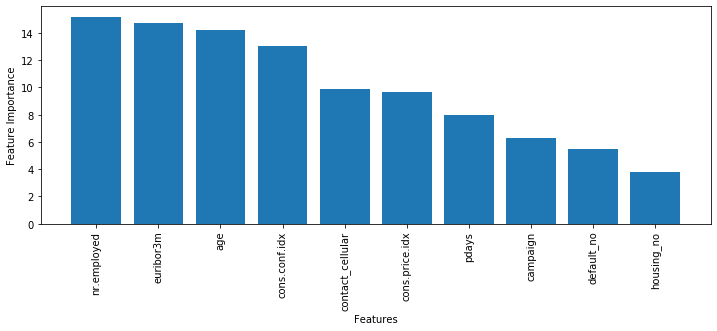

In [96]:
feat_imp=cb.get_feature_importance(prettified=True)
plt.bar(feat_imp['Feature Id'], feat_imp['Importances'])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=90)

[[1845   21]
 [ 183   51]]
AUC score:  0.812881890052308
Logloss :  0.2686845646954953


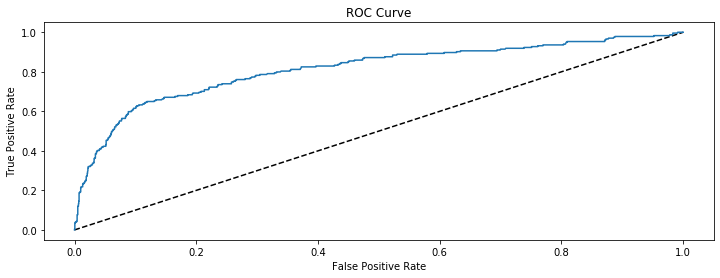

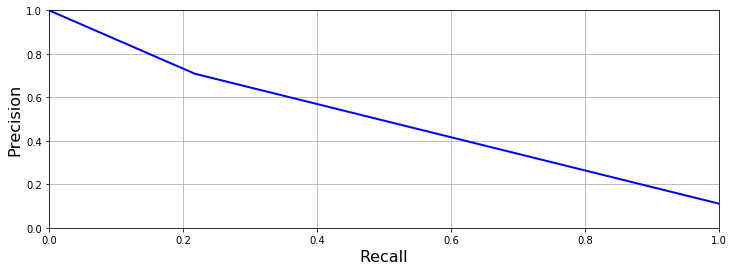

***********************----------------------------*************************


In [97]:
performance(cb,validation[selectedFeatures],validation[target])

In [98]:
#function to predict and save result
def save_res(model,test):
    model_predict = model.predict(test[selectedFeatures])
    model_proba = DataFrame(model.predict_proba(test[selectedFeatures]))[1]
    prediction["subscribe"] = DataFrame(model_proba)
    prediction.to_csv(r'C:\Users\dkalapati\Documents\kaggle competition\predictions.csv', index=False)

In [ ]:
save_res(cb,dum_predict)

In [ ]:
# Save the Model to file in the current working directory
filename = "catboost.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(cb, file)

In [ ]:
# Load from file
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Experimenting 

Voting Classifier

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
#create a list of our models
estimators = [(i, j) for i, j in models.items()]
#create our voting classifier, inputting our models
ensemble2 = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble2.fit(train[selectedFeatures], train[target])

#test our model on the test data
ensemble2.score(validation[selectedFeatures], validation[target])

0.9023809523809524

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
    

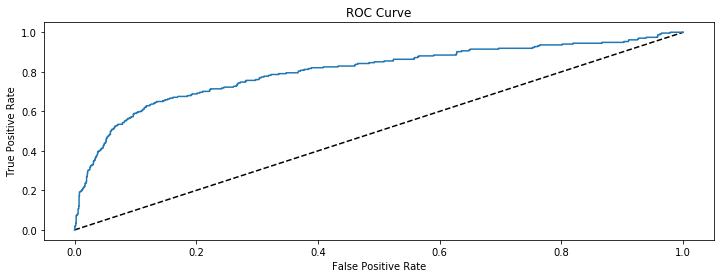

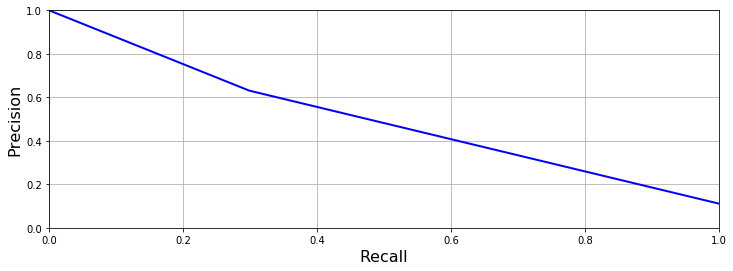

***********************----------------------------*************************


In [63]:
performance(ensemble2,validation[selectedFeatures],validation[target])

In [64]:
cv_fit(ensemble2,train,selectedFeatures)


Model Report:  VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitte

AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'

In [55]:
ensemble2

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
    

Save the Model

In [67]:
# Save the Model to file in the current working directory
filename = "ensembleval.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(ensemble2, file)

In [54]:
#function to predict and save result
def save_res(model,test):
    model_predict = model.predict(test[selectedFeatures])
    model_proba = DataFrame(model.predict_proba(test[selectedFeatures]))[1]
    prediction["subscribe"] = DataFrame(model_proba)
    prediction.to_csv(r'C:\Users\dkalapati\Documents\kaggle competition\ensembleval.csv', index=False)

In [ ]:
save_res(ensemble2,dum_predict)

Load file and predict on new set

In [ ]:
# Load from file
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Rank Data

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

weights = [0.6,0.65,0.7,0.9,0.75,1.0,0.8] # your weights for each model
files = ['C:/Users/dkalapati/Documents/kaggle competition/ensemble2valft.csv','C:/Users/dkalapati/Documents/kaggle competition/ensembleft15.csv','C:/Users/dkalapati/Documents/kaggle competition/ensembl2Final.csv','C:/Users/dkalapati/Documents/kaggle competition/ensemble2preds.csv', 'C:/Users/dkalapati/Documents/kaggle competition/cbpreds.csv', 'C:/Users/dkalapati/Documents/kaggle competition/ensembleval.csv','C:/Users/dkalapati/Documents/kaggle competition/ensemblepreds.csv'] # your prediction files 

finalRank = 0
for i in range(len(files)):
    temp_df = pd.read_csv(files[i])
    finalRank = finalRank + rankdata(temp_df.subscribe, method='ordinal') * weights[i]
finalRank = finalRank / (max(finalRank) + 1.0)

df = temp_df.copy()
df['subscribe'] = finalRank
df.to_csv(r'C:\Users\dkalapati\Documents\kaggle competition\ranktrialfinal.csv', index = False)

# Exploration and Initial Models

CATBOOST (2nd Best Model)

In [26]:
learning_rate = [0.03,0.1,0.15,0.2]
depth = [5,6,7,8]
iteration = [50,60,70,80]
for i in learning_rate:
    for j in iteration:
        for k in depth:
            cat = CatBoostClassifier(iterations = j,learning_rate = i,depth = k, task_type = 'CPU',verbose=False)
            cat.fit(train[selectedFeatures],train[target])
            probabilities = DataFrame(cat.predict_proba(train[selectedFeatures]))[1]
            auc           = roc_auc_score(array(train[target]),array(probabilities))
            print("learning :",i,"iteration :",j,"depth :",k)
            print("Accuracy score (training): {0:.3f}".format(cat.score(train[selectedFeatures],train[target])))
            print("Accuracy score (validation): {0:.3f}".format(cat.score(validation[selectedFeatures],validation[target])))
            print("AUC :",auc)
            probabilities_val = DataFrame(cat.predict_proba(validation[selectedFeatures]))[1]
            auc_val           = roc_auc_score(array(validation[target]),array(probabilities_val))
            print("auc validation :", auc_val)
            print()

learning : 0.03 iteration : 50 depth : 5
Accuracy score (training): 0.896
Accuracy score (validation): 0.893
AUC : 0.7937272727272726
auc validation : 0.8119910423452769

learning : 0.03 iteration : 50 depth : 6
Accuracy score (training): 0.896
Accuracy score (validation): 0.893
AUC : 0.7949900543900543
auc validation : 0.8132243769411409

learning : 0.03 iteration : 50 depth : 7
Accuracy score (training): 0.897
Accuracy score (validation): 0.894
AUC : 0.7955319347319347
auc validation : 0.8164343610332551

learning : 0.03 iteration : 50 depth : 8
Accuracy score (training): 0.899
Accuracy score (validation): 0.892
AUC : 0.7979729603729604
auc validation : 0.8155348079690933

learning : 0.03 iteration : 60 depth : 5
Accuracy score (training): 0.896
Accuracy score (validation): 0.893
AUC : 0.7950560994560995
auc validation : 0.8134516324520868

learning : 0.03 iteration : 60 depth : 6
Accuracy score (training): 0.896
Accuracy score (validation): 0.893
AUC : 0.7957704739704741
auc validat

learning : 0.2 iteration : 50 depth : 6
Accuracy score (training): 0.910
Accuracy score (validation): 0.889
AUC : 0.821921212121212
auc validation : 0.812743826225286

learning : 0.2 iteration : 50 depth : 7
Accuracy score (training): 0.912
Accuracy score (validation): 0.891
AUC : 0.8281235431235432
auc validation : 0.8135060790849178

learning : 0.2 iteration : 50 depth : 8
Accuracy score (training): 0.914
Accuracy score (validation): 0.887
AUC : 0.8304644910644909
auc validation : 0.8052514960987803

learning : 0.2 iteration : 60 depth : 5
Accuracy score (training): 0.909
Accuracy score (validation): 0.891
AUC : 0.8153019425019424
auc validation : 0.8148341034770092

learning : 0.2 iteration : 60 depth : 6
Accuracy score (training): 0.912
Accuracy score (validation): 0.891
AUC : 0.8236172494172493
auc validation : 0.8115625710173472

learning : 0.2 iteration : 60 depth : 7
Accuracy score (training): 0.914
Accuracy score (validation): 0.891
AUC : 0.8316871794871794
auc validation : 0.

In [60]:
cat = CatBoostClassifier(iterations = 80,learning_rate = 0.2,depth = 8, task_type = 'CPU',verbose=False)

In [61]:
cat.fit(train[selectedFeatures],train[target])

In [62]:
probabilities_val = DataFrame(cat.predict_proba(validation[selectedFeatures]))[1]
auc_val           = roc_auc_score(array(validation[target]),array(probabilities_val))

In [63]:
catboost_predict = cat.predict(dum_predict[selectedFeatures])
catboost_proba = DataFrame(cat.predict_proba(dum_predict[selectedFeatures]))[1]

In [65]:
prediction["subscribe"] = DataFrame(catboost_proba)

In [66]:
prediction.to_csv(r"C:\Users\dkalapati\Documents\kaggle competition\catboost2.csv")

In [64]:
catboost_proba

0       0.062096
1       0.043226
2       0.311674
3       0.043949
4       0.048661
          ...   
2995    0.055648
2996    0.074230
2997    0.040523
2998    0.517701
2999    0.048730
Name: 1, Length: 3000, dtype: float64

ADABOOST (Another Best Model)

In [43]:
learning = [0.01,0.05,0.1,0.15,0.2]
estimators = [100,200,300,400]
for i in learning:
    for j in estimators:
        adaboost = AdaBoostClassifier(n_estimators=j,learning_rate=i,random_state=0)    
        adaboost.fit(train[selectedFeatures],train[target])
        probabilities = DataFrame(adaboost.predict_proba(train[selectedFeatures]))[1]
        auc           = roc_auc_score(array(train[target]),array(probabilities))
        probabilitiesval = DataFrame(adaboost.predict_proba(validation[selectedFeatures]))[1]
        aucval           = roc_auc_score(array(validation[target]),array(probabilitiesval))
        print("learning rate :",i)
        print("estimators :",j)
        print("Accuracy score (training): {0:.3f}".format(adaboost.score(train[selectedFeatures],train[target])))
        print("Accuracy score (validation): {0:.3f}".format(adaboost.score(validation[selectedFeatures],validation[target])))
        print("AUC :",auc)
        print("AUC VAL:",aucval)
        print()

learning rate : 0.01
estimators : 100
Accuracy score (training): 0.884
Accuracy score (validation): 0.877
AUC : 0.7565297591297592
AUC VAL: 0.7792804522384669

learning rate : 0.01
estimators : 200
Accuracy score (training): 0.896
Accuracy score (validation): 0.893
AUC : 0.7716307692307692
AUC VAL: 0.797179190970381

learning rate : 0.01
estimators : 300
Accuracy score (training): 0.896
Accuracy score (validation): 0.893
AUC : 0.7784781662781662
AUC VAL: 0.8035352435421559

learning rate : 0.01
estimators : 400
Accuracy score (training): 0.897
Accuracy score (validation): 0.893
AUC : 0.77934560994561
AUC VAL: 0.8048514317097188

learning rate : 0.05
estimators : 100
Accuracy score (training): 0.897
Accuracy score (validation): 0.893
AUC : 0.7830430458430458
AUC VAL: 0.8063285925308689

learning rate : 0.05
estimators : 200
Accuracy score (training): 0.896
Accuracy score (validation): 0.894
AUC : 0.7901179487179487
AUC VAL: 0.8081868797818347

learning rate : 0.05
estimators : 300
Accur

In [67]:
adaboost_new = AdaBoostClassifier(n_estimators = 2500,learning_rate = 1)    
adaboost_new.fit(train[selectedFeatures],train[target])
predictions_ada = adaboost_new.predict(validation[selectedFeatures])
probabilities_ada = DataFrame(adaboost_new.predict_proba(validation[selectedFeatures]))[1]
print("Confusion Matrix:")
print(confusion_matrix(validation[target], predictions_ada))
print()
print("Classification Report")
print(classification_report(validation[target], predictions_ada))

Confusion Matrix:
[[1201   27]
 [ 132   40]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1228
           1       0.60      0.23      0.33       172

    accuracy                           0.89      1400
   macro avg       0.75      0.61      0.64      1400
weighted avg       0.86      0.89      0.86      1400



In [68]:
auc_ada = roc_auc_score(array(validation[target]),array(probabilities_ada))

In [69]:
auc_ada

0.7738097492614197

In [70]:
adaboost_predict = adaboost_new.predict(dum_predict[selectedFeatures])
adaboost_proba = DataFrame(adaboost_new.predict_proba(dum_predict[selectedFeatures]))[1]

In [71]:
adaboost_proba

0       0.499686
1       0.499640
2       0.499852
3       0.499691
4       0.499761
          ...   
2995    0.499665
2996    0.499786
2997    0.499707
2998    0.499806
2999    0.499746
Name: 1, Length: 3000, dtype: float64

In [72]:
prediction["subscribe"] = DataFrame(adaboost_proba)

In [73]:
prediction.to_csv(r"C:\Users\dkalapati\Documents\kaggle competition\adaproba2.csv")

First Submission 

In [ ]:
#gradient boosting

In [111]:
boostedTree_new  = GradientBoostingClassifier()
boostedTree_new.fit(train[selectedFeatures],train[target])
predictions_boost = boostedTree_new.predict(validation[selectedFeatures])
probabilities_boost = DataFrame(boostedTree_new.predict_proba(validation[selectedFeatures]))[1]
print("Confusion Matrix:")
print(confusion_matrix(validation[target], predictions_boost))
print()
print("Classification Report")
print(classification_report(validation[target], predictions_boost))

Confusion Matrix:
[[1200   28]
 [ 131   41]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1228
           1       0.59      0.24      0.34       172

    accuracy                           0.89      1400
   macro avg       0.75      0.61      0.64      1400
weighted avg       0.86      0.89      0.86      1400



In [112]:
auc_boost = roc_auc_score(array(validation[target]),array(probabilities_boost))

In [113]:
auc_boost

0.8059924437542609

In [36]:
boost_predict = boostedTree_new.predict(dum_predict[selectedFeatures])
boost_proba = DataFrame(boostedTree_new.predict_proba(dum_predict[selectedFeatures]))[1]

NameError: name 'boostedTree_new' is not defined

In [243]:
boost_proba

0       0.062338
1       0.050356
2       0.539795
3       0.039036
4       0.037209
          ...   
2995    0.070907
2996    0.062951
2997    0.039237
2998    0.629966
2999    0.031228
Name: 1, Length: 3000, dtype: float64

In [246]:
prediction["subscribe"] = DataFrame(boost_proba)

In [247]:
prediction

,client_id,subscribe
0,1,0.062338
1,10,0.050356
2,11,0.539795
3,12,0.039036
4,13,0.037209
...,...,...
2995,9990,0.070907
2996,9995,0.062951
2997,9996,0.039237
2998,9999,0.629966


In [248]:
prediction.to_csv(r"C:\Users\dkalapati\Documents\kaggle competition\proba.csv")

In [97]:
gbm0_predict = gbm0.predict(validation[selectedFeatures])
gbm0_proba = DataFrame(gbm0.predict_proba(validation[selectedFeatures]))[1]

In [98]:
gbm0_boost = roc_auc_score(array(validation[target]),array(gbm0_proba))

In [99]:
gbm0_boost

0.7980905802590712

In [ ]:
##################